

# Portfolio Management-Eigen Portfolio

In this case study we will: 1) complete pricipal component analysis (PCA) from scratch; 2) use PCA for portfolio management and allocation.


Reference: [1] Tatsat, Hariom, Sahil Puri, and Brad Lookabaugh. Machine Learning and Data Science Blueprints for Finance. O'Reilly Media, Incorporated, 2020.

# 1. Completion of PCA from scratch

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction, data compression, and visualization. It is a mathematical method that identifies patterns and correlations in high-dimensional data by projecting it onto a lower-dimensional space while preserving as much of the original information as possible. The principal components are the linear combinations of the original variables that capture the most variation in the data.

In [7]:
import pandas as pd
import numpy as np
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
X = data.iloc[:,0:4]
num_components = 2
#prepare the target
target = data.iloc[:,4]

Step-1: Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.This involves subtracting the mean of each variable and dividing by its standard deviation:

\begin{equation}
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
\end{equation}

where $z_{ij}$ is the standardized value of the $i$th observation on the $j$th variable, $x_{ij}$ is the original value, $\mu_j$ is the mean of the $j$th variable, and $\sigma_j$ is the standard deviation of the $j$th variable.

In [8]:
X_meaned = X - np.mean(X , axis = 0)

Step-2: Calculate the covariance matrix of the mean-centered data. The sample-based covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its variance. The $(i,j)$-th element of the covariance matrix $\Theta$ is given by:

$$\Theta(i, j) = \frac{1}{n} \sum_{k=1}^{n}(z_{ik}-\bar{z}_i)(z_{jk}-\bar{z}_j)$$

where $z_{ik}$ and $z_{jk}$ are the $i$-th and $j$-th variables of the $k$-th observation, and $\bar{z}_i$ and $\bar{z}_j$ are the means of the $i$-th and $j$-th variables, respectively.

In [9]:
cov_mat = np.cov(X_meaned , rowvar = False)

Step-3: Now, compute the Eigenvalues and Eigenvectors for the calculated covariance matrix. The eigenvectors of the covariance matrix represent the directions of maximum variance in the data, while the corresponding eigenvalues represent the magnitude of the variance in those directions. The eigenvectors and eigenvalues can be found by solving the following equation:

\begin{equation}
\Theta\mathbf{v} = \lambda\mathbf{v}
\end{equation}

where $\mathbf{v}$ is the eigenvector, and $\lambda$ is the corresponding eigenvalue.

In [10]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

Step-4: Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
The eigenvectors can be sorted in decreasing order of their corresponding eigenvalues. The eigenvectors with the highest eigenvalues are the principal components that capture the most variation in the data.

In [11]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

Step-5: The number of principal components to retain depends on the amount of variance that needs to be explained in the data. This can be determined by examining the cumulative proportion of variance explained by each principal component.

In [12]:
eigenvector_subset = sorted_eigenvectors[:,0:num_components]

Step-6: The final step in PCA is to project the standardized data onto the new coordinate system defined by the principal components:

\begin{equation}
y_i = \mathbf{v}^Tz_i
\end{equation}

where $y_i$ is the $i$th observation in the new coordinate system, $\mathbf{v}$ is the eigenvector matrix, and $z_i$ is the standardized vector of the $i$th observation.

In [13]:
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

In [15]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

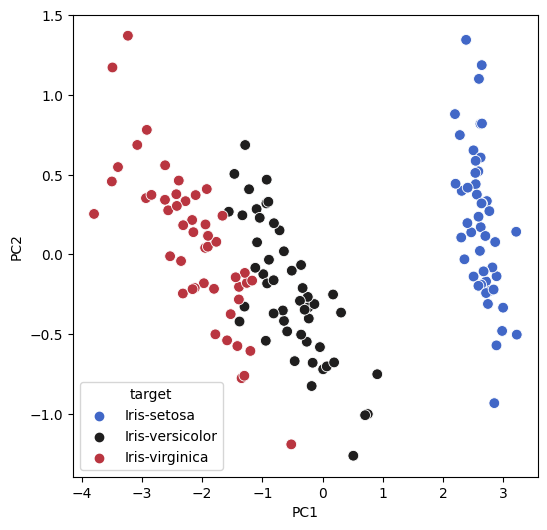

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

Question: You are required to generate the cumulative explained variance with PCA for the Wine Quality dataset and provide your Observation. This dataset is a classic example in machine learning and consists of measurements of various properties of wine, as well as a quality rating, for red and white wine samples.

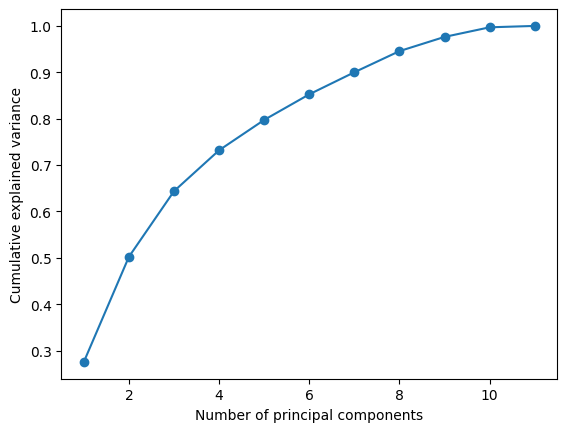

In [57]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Wine Quality dataset
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
                       sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 
                         sep=';')

# Add a color column to each dataset
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# Combine the datasets
wine = pd.concat([red_wine, white_wine])

# # Step-1: Subtract the mean of each variable. Consider to use an alternative method StandardScaler() from sklearn
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.drop(['color', 'quality'], axis=1))

# Step-2: Calculate the covariance matrix of the mean-centered data.
covariance_matrix = np.cov(wine_std.T)

# Step-3: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step-4: Sort the eigenvectors by their eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the total variance
total_variance = sum(eigenvalues)

# Calculate the explained variance and cumulative explained variance
explained_variance = [eigenvalue / total_variance for eigenvalue in sorted(eigenvalues, reverse=True)]
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(range(1, 12), cumulative_explained_variance, '-o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()


Observation: From the plot, we can see that the first five principal components explain over 90% of the variance in the data. Therefore, we will retain the first five principal components for our analysis.

<a id='0'></a>
# 2. PCA for portfoilo management: problem definition

Our goal in this case study is to maximize risk-adjusted returns using dimensionality
reduction-based algorithm on a dataset of stocks to allocate capital into different asset
classes.

The dataset used for this case study is Dow Jones Industrial Average (DJIA) index and
its respective 30 stocks from year 2000-2017. The dataset can be downloaded from
yahoo finance.


<a id='1.1'></a>
## 2.1. Loading the python packages

In [341]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [342]:
# load dataset
dataset = read_csv('Dow_adjcloses_2000_2017.csv',index_col=0)

In [343]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [344]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [345]:
# shape
dataset.shape

(4528, 30)

In [346]:
# peek at data
set_option('display.width', 100)
dataset.head(3)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,NaN,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097


In [347]:
# types
set_option('display.max_rows', 500)
# dataset.dtypes

In [348]:
# describe data
pd.options.display.precision=3
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,87.000,...,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,4528.000,2465.000,4528.000,4528.000
mean,79.444,46.591,40.824,69.771,51.553,58.333,20.320,23.773,42.640,68.332,...,20.715,19.649,48.026,51.525,58.335,53.254,25.733,44.440,48.273,39.992
std,46.247,19.358,44.589,48.126,28.378,29.387,8.739,9.673,29.883,2.153,...,17.533,6.348,18.610,30.471,29.406,44.853,10.672,27.972,14.049,19.208
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,61.620,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,49.438,33.434,3.484,36.192,25.666,28.221,14.751,15.203,21.631,68.020,...,7.705,14.839,34.932,29.415,33.540,22.634,17.258,18.473,37.813,27.371
50%,60.891,40.834,20.687,56.646,51.219,54.888,18.138,19.850,29.050,68.988,...,13.088,17.862,45.796,38.892,53.776,41.724,20.848,37.958,42.218,31.621
75%,97.710,59.393,71.059,89.976,73.265,86.010,22.861,32.890,58.913,69.616,...,29.682,24.000,64.634,73.367,82.736,60.697,37.335,68.023,62.462,44.243
max,236.889,97.873,173.813,292.090,153.954,121.340,63.698,45.469,115.471,71.251,...,64.619,35.615,89.752,132.553,125.350,225.140,50.478,113.600,97.095,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

<AxesSubplot: title={'center': 'Correlation Matrix'}>

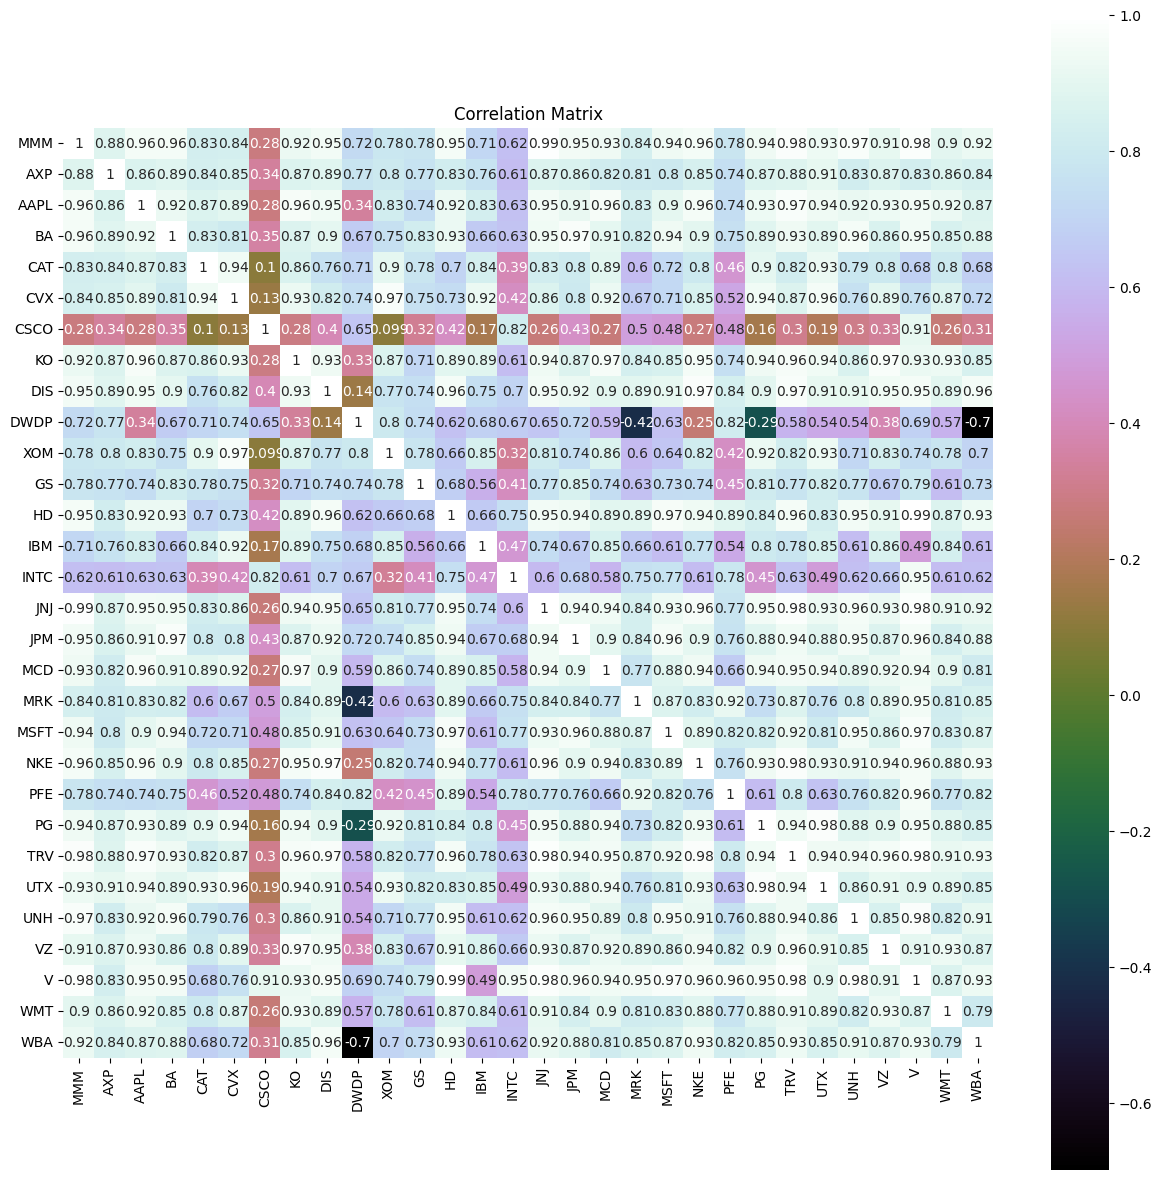

In [349]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the chart above, there is a significant positive correlation between
the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [350]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [351]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4528, 28)

Given that there are null values drop the rown contianing the null values.

In [352]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907


Computing Daily Return

In [353]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)
# print(datareturns)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of
0 and a standard deviation of 1.

In [354]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.725,0.558,-2.681,-1.137,-1.045,-0.783,-1.805,3.542,0.723,0.99,...,-1.933,3.667,-0.163,1.768,-0.924,-1.940,0.082,-0.833,-1.373,2.938
2000-01-20,-3.596,1.062,3.272,-1.680,-2.856,-0.441,0.029,0.982,-2.380,-1.90,...,-0.726,-1.806,-1.407,-2.731,-0.469,-1.902,1.643,0.240,-0.986,-0.029


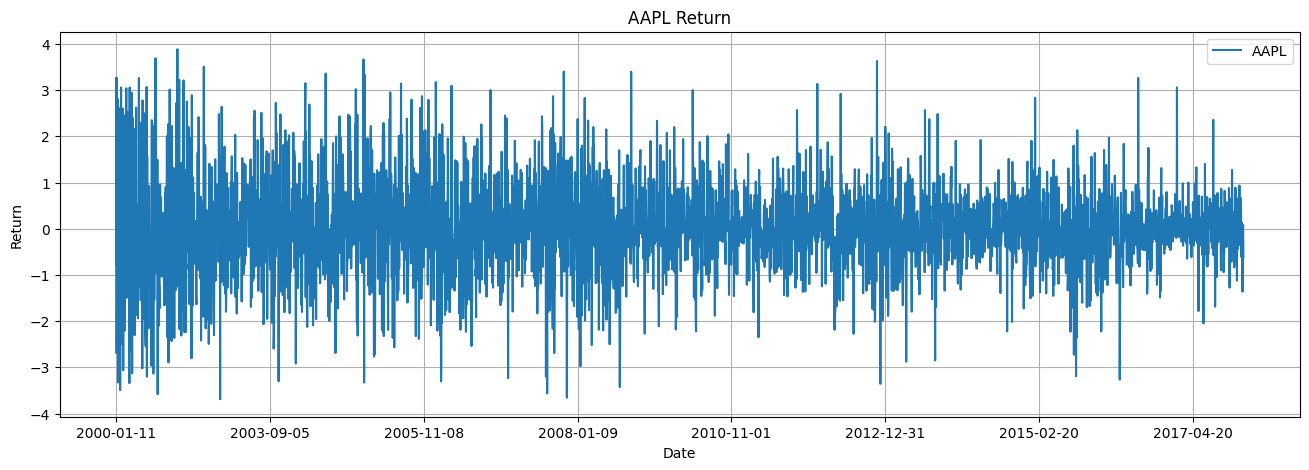

In [355]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

The portfolio is divided into train and test split to perform the analysis regarding the best porfolio and backtesting shown later. 

In [368]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

As this step, we create a function to compute principle component analysis from sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [357]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)
print(pca.components_.shape)

(28, 28)


<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

,Explained Variance
0,36.69%
1,42.41%
2,46.75%
3,50.70%
4,54.27%
5,57.37%
6,60.30%
7,63.12%
8,65.90%
9,68.43%


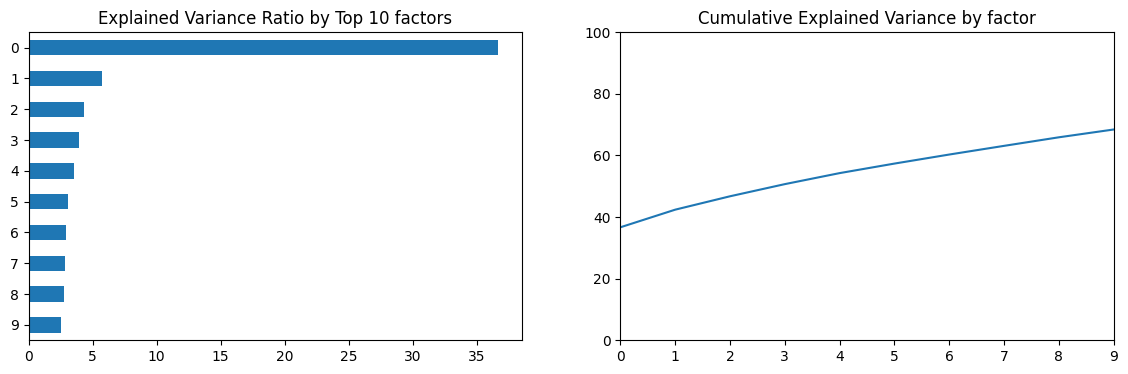

In [358]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We find that the most important factor explains around 40% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, depending on the results of closer inspection.

The plot on the right shows the cumulative explained variance and indicates that 10 factors explain around 68% of the returns of this large cross-section of stocks.  

<a id='4.2.2'></a>
## 5.2.2.Looking at Portfolio weights

We compute several functions to determine the weights of each principle component. We then visualize a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

When using PCA to allocate weights to assets in a portfolio, it is important to normalize the weights. This is because PCA can generate weights that do not necessarily add up to one. It can cause problems when trying to implement the portfolio. For exmaple, some of the weights generated by PCA are negative because the current optimisation of PCA do not use a constrained optimization method that incorporates constraints on the signs of the weights with a quadratic programming algorithm [1]. In this class, we do not dive into this algorithm.  

The portfolio reweighting strategy generated by PCA is flexible and lacks theoretical proof. It depends on the specific goals and requirements of the portfolio construction process. In this lab, three approaches are presented below, and you can choose one you prefer. 

Interpretation of variables would help you to understand the reweighting strategies. Interpreting the variables in a principal component involves understanding which original variables contribute the most to that component. To interpret the variables in a principal component, you can look at the loadings and identify which original variables have the highest absolute values. These variables are the most important contributors to that principal component. In the context of portfolio management, if a variable is negative, it indicates that the corresponding assets have negative correlations with the other assets in the portfolio.

[1] Quadratic programming on Wiki: https://en.wikipedia.org/wiki/Quadratic_programming

In [369]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        
#         Approach one: rigidly follow the traditional normalisation 
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])
        
#         Approach two: follow the traditional normalisation while considering the magnitude of contributions of variables to PC.
#         weights["weights_{}".format(i)] = abs(pca.components_[i]) / sum(abs(pca.components_[i]))

#         Approach three: follow the traditional normalisation while considering both the magnitude of contributions and the sign of variables. 

#         abs_norm = abs(pca.components_[i]) / sum(abs(pca.components_[i]))
#         weights["weights_{}".format(i)] = [x if y >= 0 else -x for x, y in zip(abs_norm, pca.components_[i])]

    weights = weights.values.T
    return weights

weights=PCWeights()

In [370]:
pca.components_[1]

array([-0.0245915 ,  0.08371331,  0.32742084,  0.00047148,  0.07023466,
       -0.13244825,  0.35116385, -0.2439285 ,  0.08813336, -0.15489952,
        0.15670653,  0.02121838,  0.18037408,  0.333498  , -0.34961949,
        0.12030775, -0.10241442, -0.29207537,  0.21408278,  0.01592783,
       -0.22983026, -0.30593528, -0.05702277,  0.03759384, -0.1626713 ,
       -0.08832067, -0.05901625, -0.10930514])

In [371]:
weights[1]

array([ 0.07901339, -0.26897398, -1.05201533, -0.00151487, -0.22566658,
        0.42556113, -1.12830247,  0.78375132, -0.28317576,  0.49769791,
       -0.50350389, -0.06817544, -0.57954861, -1.07154146,  1.12334039,
       -0.38655328,  0.32906133,  0.938449  , -0.68785593, -0.05117672,
        0.73845315,  0.98298141,  0.18321627, -0.12079042,  0.52266893,
        0.28377761,  0.18962141,  0.35120149])

[[-0.22898322 -0.22901756 -0.15220694 -0.1952779  -0.20521686 -0.17684642
  -0.1973828  -0.16494626 -0.20891969 -0.19343822 -0.20864682 -0.20131557
  -0.19851018 -0.19959927 -0.16354901 -0.22660173 -0.14901936 -0.16798035
  -0.19359383 -0.17219759 -0.19052429 -0.1663214  -0.19687553 -0.2275194
  -0.13387646 -0.16681379 -0.16884441 -0.15965923]
 [-0.0245915   0.08371331  0.32742084  0.00047148  0.07023466 -0.13244825
   0.35116385 -0.2439285   0.08813336 -0.15489952  0.15670653  0.02121838
   0.18037408  0.333498   -0.34961949  0.12030775 -0.10241442 -0.29207537
   0.21408278  0.01592783 -0.22983026 -0.30593528 -0.05702277  0.03759384
  -0.1626713  -0.08832067 -0.05901625 -0.10930514]
 [-0.14663016 -0.0383714   0.06528634 -0.19766411 -0.27962897 -0.46314217
   0.14058081  0.14559874  0.04156506 -0.41843621 -0.14369235  0.18777353
   0.10903408  0.17529187  0.11269352 -0.09928563  0.1190517   0.15826728
   0.13042169  0.04554117  0.13190496  0.17359366 -0.06349615 -0.18894665
  -0.076629

array([[<AxesSubplot: title={'center': 'Portfolio 0'}>],
       [<AxesSubplot: title={'center': 'Portfolio 1'}>],
       [<AxesSubplot: title={'center': 'Portfolio 2'}>],
       [<AxesSubplot: title={'center': 'Portfolio 3'}>],
       [<AxesSubplot: title={'center': 'Portfolio 4'}>]], dtype=object)

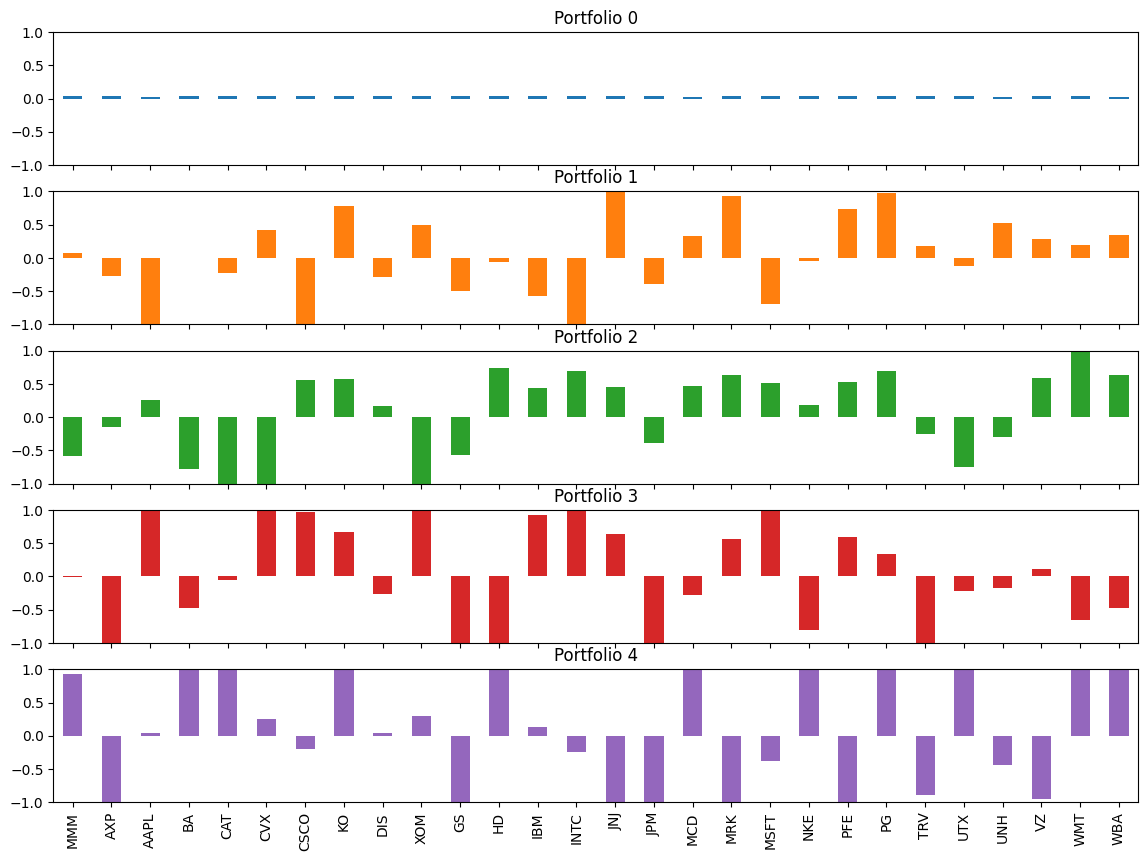

In [372]:
NumComponents=5
print(pca.components_[:NumComponents])      
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
# np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<AxesSubplot: >

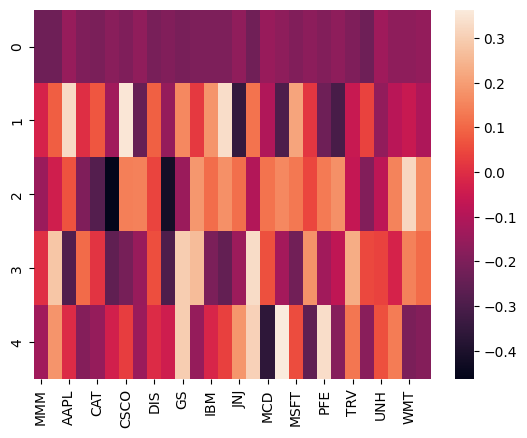

In [373]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

The heatmap and the plot above shown the contribution of different stocks in each
eigenvector.

<a id='4.2.3'></a>
## 5.2.3. Finding the Best Eigen Portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the sharpe ratio, which is a performance
metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The annualized sharpe ratio is computed by dividing
the annualized returns against the annualized volatility. For annualized return we
apply the geometric average of all the returns in respect to the periods per year (days
of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the periods per year.

In [374]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculates the annualized return, annualized volatility, and annualized Sharpe ratio. Here we do not incorporate 
    a constant risk-free rate (e.g., T-Bill). You are welcome to consider this factor to reshape your model.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

We construct a loop to compute the principle component’s weights for each eigen
portfolio, which then uses the sharpe ratio function to look for the portfolio with the
highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we
can visualize its performance against the DJIA Index for comparison.

[-0.00142315 -0.00919367 -0.00648726 ...  0.00940333  0.0008175
  0.01091192]
(2932,)
[ 0.11605917  0.00667017  0.01443094 ...  0.01385604  0.00465112
 -0.06514646]
(2932,)
[ 0.08852885  0.09528331 -0.08759171 ...  0.04521645  0.03821673
 -0.08162694]
(2932,)
[-1.68209134e-02  6.66492398e-02  1.89060683e-02 ...  7.85123201e-03
 -7.06654059e-02 -7.90087154e-05]
(2932,)
[ 0.180251   -0.23210901  0.09175922 ... -0.09190172  0.05970289
  0.04388839]
(2932,)
[-0.02057972  0.11305964  0.16334994 ...  0.01204131 -0.00528282
 -0.0072218 ]
(2932,)
[-0.16478578  0.48358664 -0.57042288 ...  0.32759687  0.12040728
 -0.01635405]
(2932,)
[ 0.07962876  0.19089545 -0.10314298 ... -0.00542808  0.00686401
 -0.00463551]
(2932,)
[0.13582447 0.05530936 0.11732269 ... 0.06238742 0.27401673 0.04759749]
(2932,)
[-0.407227    0.92059638 -1.24338589 ...  0.10887267  0.11120371
  0.04352783]
(2932,)
[-0.14227854  0.2085595   0.12257791 ... -0.01050445  0.02762288
  0.02907318]
(2932,)
[-2.04078435 -0.41075065 -1

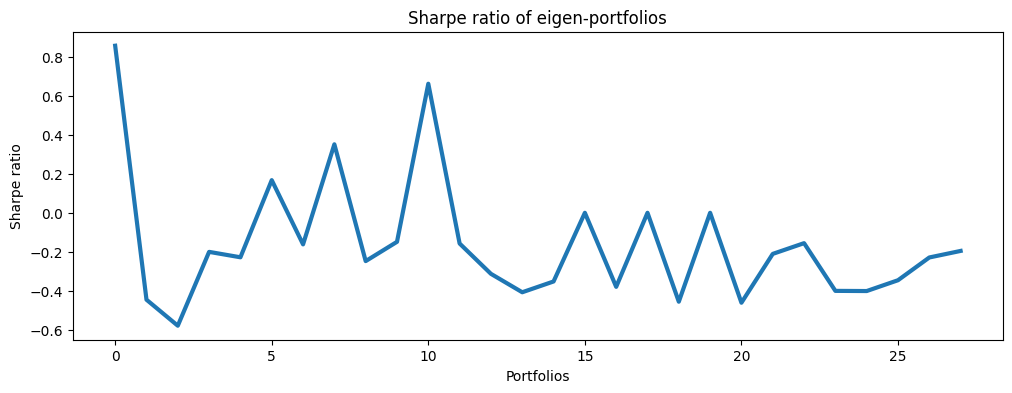

In [379]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    for i in range(n_portfolios):
        
#        You can apply another two reweighting strategies shown before. 
        pc_w = pcs[i] / sum(pcs[i])

        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

As shown from the results above, the portfolio 0 is the best portfolio and has the maximum sharp ratio out of all the porfolio. Let us look at the composition of this portfolio. 

Sum of weights of current eigen-portfolio: 100.00


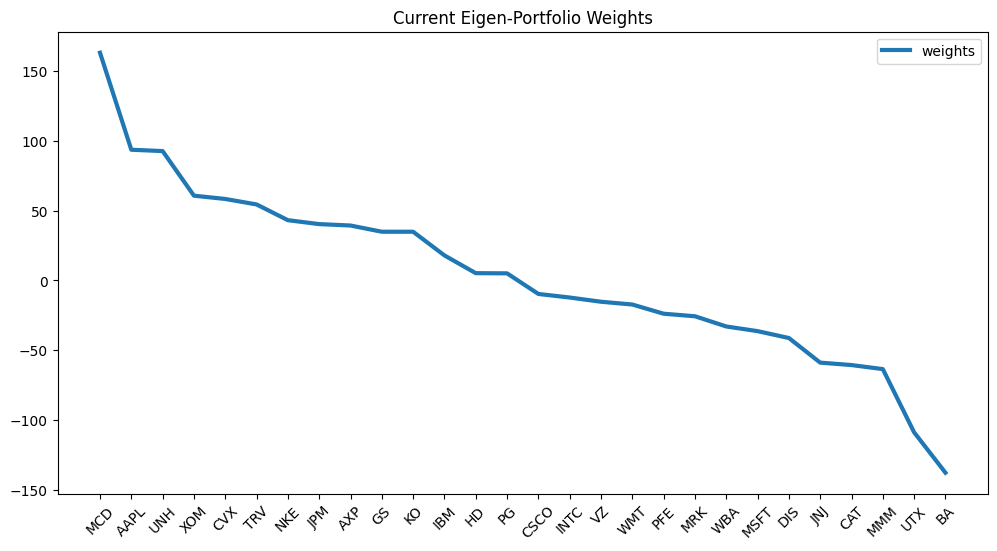

,weights
MCD,163.331
AAPL,93.741
UNH,92.786
XOM,60.796
CVX,58.440
TRV,54.512
NKE,43.219
JPM,40.406
AXP,39.391
GS,34.941


In [376]:
weights = PCWeights()
# print(weights[1].sum())
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[7], plot=True)

The chart shows the allocation of the best portfolio. The weights in the chart are in
percentages. 

<a id='4.2.4'></a>
## 5.2.4. Backtesting Eigenportfolio

We will now try to backtest this algorithm on the test set, by looking at few top and bottom portfolios.

Current Eigen-Portfolio:
Return = 13.21%
Volatility = 10.99%
Sharpe = 1.20


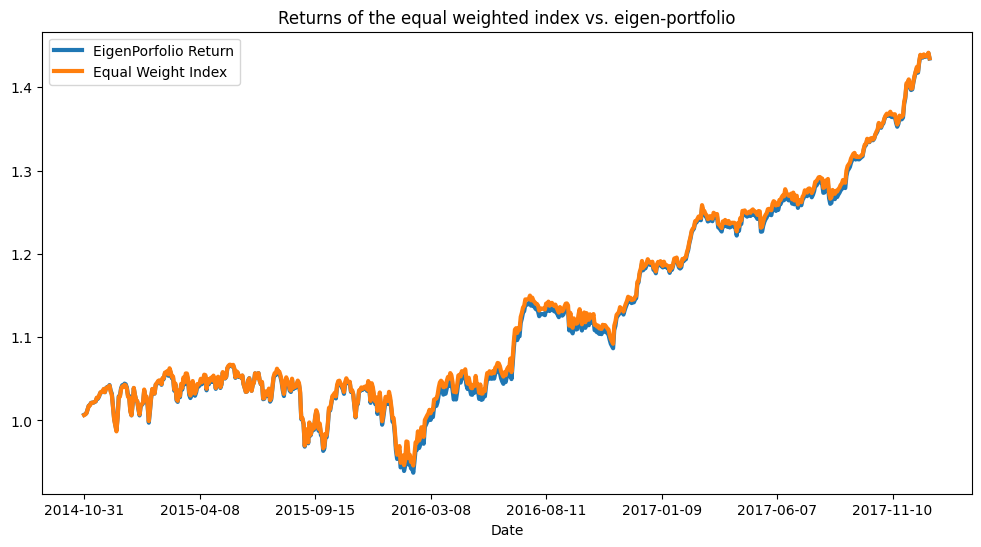

Current Eigen-Portfolio:
Return = -3.99%
Volatility = 62.96%
Sharpe = -0.06


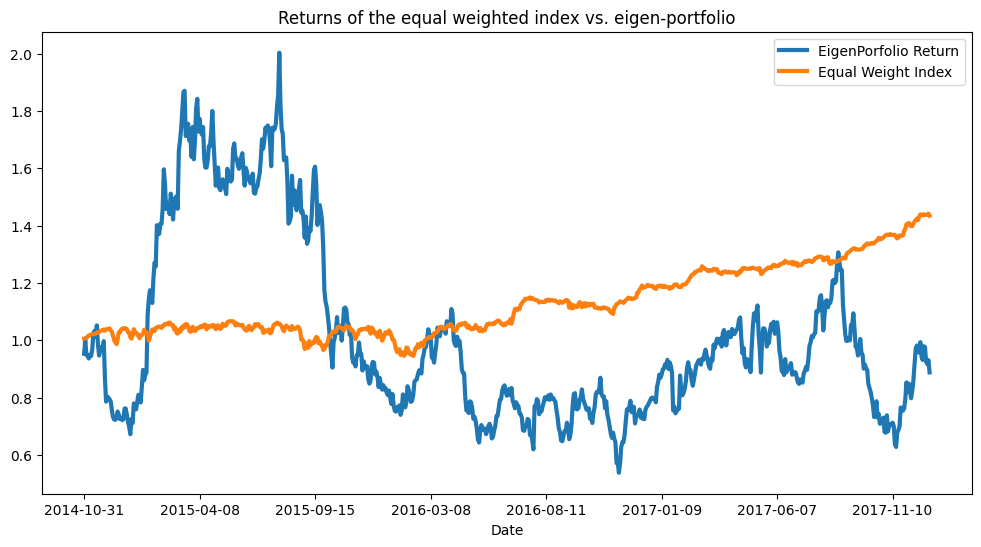

Current Eigen-Portfolio:
Return = -6.73%
Volatility = 47.43%
Sharpe = -0.14


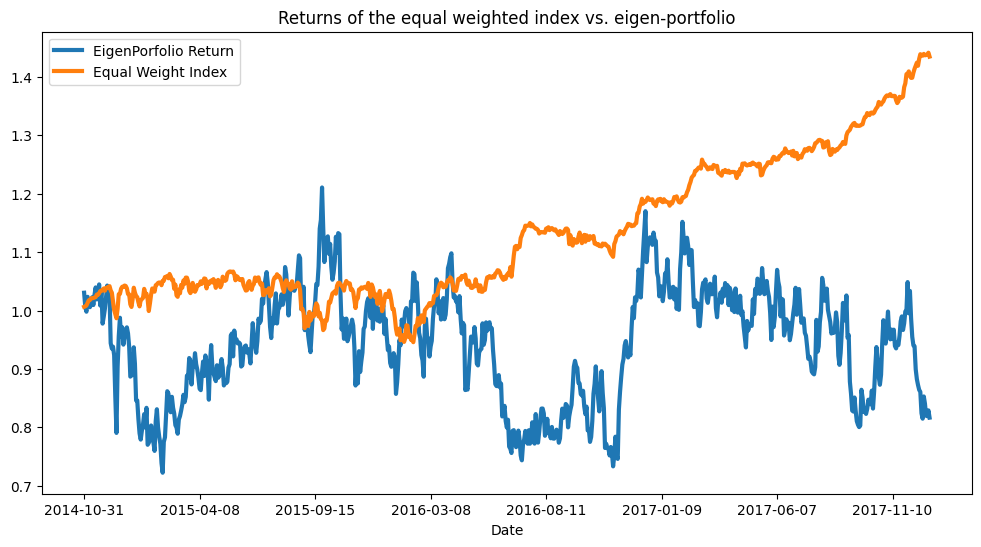

Current Eigen-Portfolio:
Return = 120.06%
Volatility = 84.80%
Sharpe = 1.42


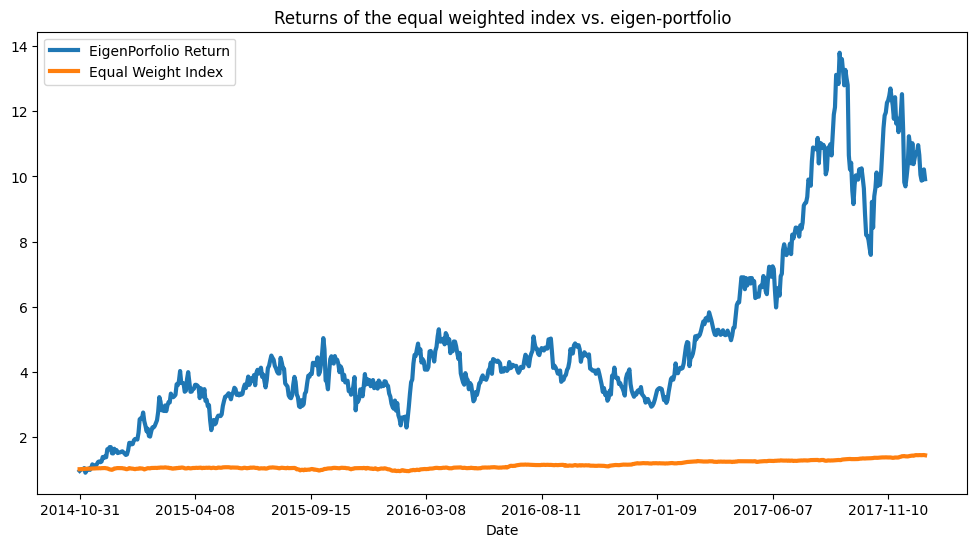

In [377]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()

Backtest(eigen=weights[0])
Backtest(eigen=weights[10])
Backtest(eigen=weights[7])
Backtest(eigen=weights[5])

__Conclusion__

In terms of the intuition behind the eigen portfolios, we demonstrated that the first
eigen portfolio represents a systematic risk factor and other eigen portfolio may represent sector or industry factor. We discuss diversification benefits offered by the eigen
portfolios as they are derived using PCA and are independent.
